In [72]:
import numpy as np
import matplotlib.pyplot as plt


**Задание 1**

Дан объект в $2D$ пространстве

При помощи линейных отображений:

- Уменьшить объект в два раза
- Повернуть на 130 градусов
- Отразить объект относительно прямой y=x (поможет матрица [[0, 1, 0], [1, 0, 0], [0, 0, 1]])

(-200.0, 200.0)

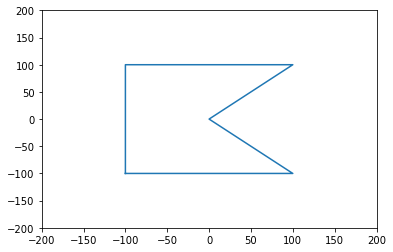

In [218]:

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

Уменьшить объект в два раза:

In [74]:
mult_mat = np.array([[0.5,0,0],[0,0.5,0],[0,0,0.5]])

In [77]:
cont = mult_mat@A.transpose()
contract = cont.transpose()

(-200.0, 200.0)

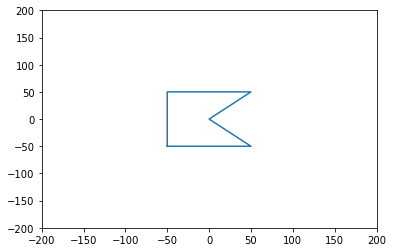

In [217]:
x = contract[:,0]
y = contract[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

Повернуть на 130 градусов:

In [172]:
# Создаем поворотную матрицу (нашел класную статейку вот тут: https://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/)
theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.array([[c,-s,1],[s,c,1],[1,1,1]]) # пришлось допилить поворотную матрицу для соблюдения размерностей
rot_a = contract@R

(-200.0, 200.0)

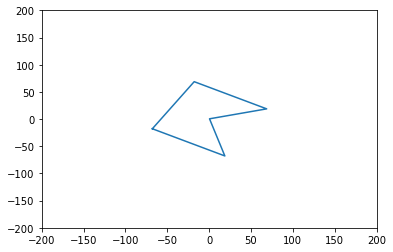

In [206]:
x = rot_a[:,0]
y = rot_a[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

Отразить объект относительно прямой y=x (поможет матрица [[0, 1, 0], [1, 0, 0], [0, 0, 1]]):

In [213]:
# Меня смутила предложенная матрица (либо я не понял задание) и я поменял ее на такую, чтобы было зеркальное отражение

mirror = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])

In [215]:
mir = mirror@A.transpose()
mir_m = mir.transpose()

(-200.0, 200.0)

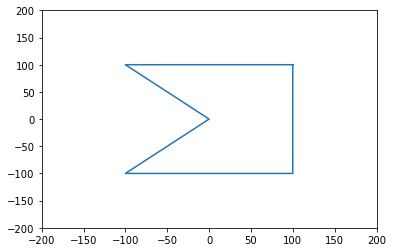

In [219]:
x = mir_m[:,0]
y = mir_m[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

**Задание 2.**

Найдите спектральное разложение матрицы:\n",
        
        m = np.array([[1, 2],
                      [2, 3]])
                    

Спектральное разложение матрицы - это произведение диагонлаьной матрицы, полученной из собственных значений матрицы и двух других ортогональных матриц, полученных из собственных векторов матрицы.
Т.о., для начала нам нужно получить собственные значения и собственные векторы матрицы.

В процессе работы наткнулся на два метода:
    eig и eigh
выяснилось, что:
- eigh() -- служит для работы с эрмитовыми матрицами, всегда возвращает вещественные собственные значения.
- eig() -- скорее всего вернёт комплексные собственные значения, и она численно менее точна и более медленна, чем eigh()
    
Т.о., будем использовать метод eigh()

In [270]:
m = np.array([[1, 2],
                  [2, 3]])

In [271]:
self_value, self_matrix = np.linalg.eigh(m)
print('собственные значения: ', self_value, '\n')

print('собственный вектор: \n',self_matrix)

собственные значения:  [-0.23606798  4.23606798] 

собственный вектор: 
 [[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


In [254]:
sv_diag = np.diag(self_value) # создаем диагональную матрицу из собственных значений матрицы m
sv_diag

array([[1.38196601, 0.        ],
       [0.        , 3.61803399]])

Далее сделаем транспонируем матрицу второго собственного вектора, чтобы достичь ортогональности:

In [263]:
self = self_matrix.T
self

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

In [266]:
self_t = self.T
self_t

array([[-0.85065081,  0.52573111],
       [ 0.52573111,  0.85065081]])

Убедимся в ортогональности матриц:

In [257]:
np.dot(self_mt, self_matrix)

array([[ 1.0000000e+00, -1.2127222e-17],
       [-1.2127222e-17,  1.0000000e+00]])

Далее просто перемножим последовательно все получившиеся величины

In [268]:
spectral = np.dot(np.dot(sv_diag, self), self_t)
spectral

array([[1.38196601e+00, 1.11022302e-16],
       [0.00000000e+00, 3.61803399e+00]])

По идее, после такого перемножения у нас должна была получиться исходная матрица. В чем у меня ошибка?